In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- L2 Regularization (Default in LogisticRegression) ---

# Create a Logistic Regression model with L2 penalty
# The default penalty is 'l2', and C is the inverse of the regularization strength.
# Smaller C means stronger regularization.
l2_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)

# Train the model
l2_model.fit(X_train, y_train)

# Predict on the test set
y_pred_l2 = l2_model.predict(X_test)

# Evaluate the model
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"L2 Regularization Accuracy: {accuracy_l2:.4f}")
print("L2 Model Coefficients:", l2_model.coef_)

# --- L1 Regularization ---

# Create a Logistic Regression model with L1 penalty
# Need to use a solver that supports L1 regularization like 'liblinear' or 'saga'
l1_model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)

# Train the model
l1_model.fit(X_train, y_train)

# Predict on the test set
y_pred_l1 = l1_model.predict(X_test)

# Evaluate the model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"\nL1 Regularization Accuracy: {accuracy_l1:.4f}")
print("L1 Model Coefficients:", l1_model.coef_)

L2 Regularization Accuracy: 1.0000
L2 Model Coefficients: [[-3.78959589e-01  5.05563387e-01  9.69659244e-01 -5.67685500e-01
  -2.87470554e-02  2.95493937e-01  1.55001481e+00  1.22385631e-01
  -3.84369247e-01 -3.19571194e-02 -6.03891265e-02  4.97113669e-01
   1.33268038e-02]
 [ 6.63722832e-01 -8.56540719e-01 -6.53287753e-01  2.53973175e-01
   6.68408160e-03 -7.89379424e-03  3.67803606e-01  1.95723044e-01
   7.05874519e-01 -1.64581437e+00  5.57495117e-01  4.53422752e-01
  -1.14075828e-02]
 [-3.04169793e-01  4.98001789e-01  1.13143839e-01  1.09708939e-01
   2.10061254e-02 -5.54243509e-01 -1.63744060e+00 -1.05814520e-01
  -7.37980628e-01  1.03871698e+00 -4.57814403e-01 -1.23194413e+00
  -3.90157054e-04]]

L1 Regularization Accuracy: 0.9815
L1 Model Coefficients: [[-2.29094188e-01  3.53639358e-01  3.98000541e-01 -5.20970791e-01
  -4.38771262e-02  0.00000000e+00  2.14424302e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.36273155e-02]
 [ 8.29325125e

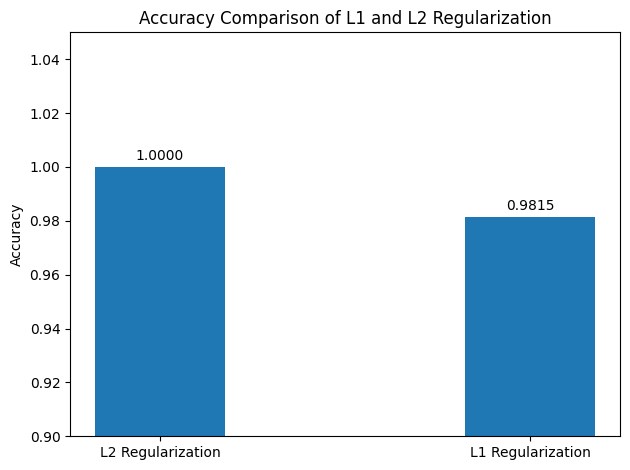

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores from the previous cell
accuracy_l2 = 1.0
accuracy_l1 = 0.9814814814814815

labels = ['L2 Regularization', 'L1 Regularization']
accuracy_scores = [accuracy_l2, accuracy_l1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, accuracy_scores, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of L1 and L2 Regularization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.9, 1.05]) # Adjust y-axis to better show the difference

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()

plt.show()